**Montando drive do google localmente**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#pip list #checando pacotes instalados e suas verções

In [ ]:
#lact / proc/

In [ ]:
import os #Módulos OS em python #Uma maneira simples de usar funcionalidades que são depe

Listando as pastas existentes em meu drive

In [ ]:
path = "/content/gdrive/My Drive"
dirs = os.listdir (path)
for file in dirs:
  print(file)


How to get started with Drive.pdf
Aula 02 FD - Apostila desenho geométrico.pdf
Aula 12 - Teoria da Cor - NOVO.pdf
Aula 11 FD - Luz e sombra com fotos - atividade prática NOVO(2).pdf
desenhando-com-o-lado-direito-do-cerebro-betty-edwards-4-edicao.pdf
AULA-4-DFH-ROSTOS-E-CABELOS..pdf
Comprovante (1).pdf
07180935344_Emissão_de_Carteira_de_Trabalho_Brasileiro_24062017.pdf
Documento 4 (4).pdf
Documento 4 (3).pdf
Documento 4 (2).pdf
Documento 4 (1).pdf
Documento 4.pdf
SIGAA - Sistema Integrado de Gestão de Atividades Acadêmicas.pdf
Áudio de Dani Rfelix
MODELO BRIEFING PHILPS (1)   talita (1).gdoc
peixinho repetição.ai
estampaa 2 wes vai.pdf
PEIXINHO ESTAMPA.ai
PEIXINHO ESTAMPA vai.pdf
peixinho repetição vai.pdf
estampaa 2 wes.ai
Instagram_piaba 1.png
IMG_20171214_153751_707.jpg
IMG_20171216_220312212~2.jpg
IMG_20171224_234336859.jpg
IMG_20171224_234309388.jpg
IMG_20171224_222805178.jpg
IMG_20171216_220312212.jpg
IMG_20171124_095553008.jpg
personagem principal (1).wav
personagem pri

Listando o arquivo que contém na minha pasta aws

In [ ]:
os.listdir("/content/gdrive/My Drive/fotos workshop")

['credentials.csv',
 'credentials',
 'image1.jpg',
 'image2.jpg',
 'image3.jpg',
 'image5.jpg',
 'image4.jpeg',
 'image6.jpeg']

Criando a API de configuração


In [ ]:
 !mkdir -p ~/.aws &&\
  cp /content/gdrive/My\ Drive/fotos\ workshop/credentials ~/.aws/credentials 


In [ ]:
!pip install boto3

importando  bibliotecas

In [ ]:
import boto3 #https://boto3.amazonaws.com/v1/documentation/api/latest/index.html
from PIL import Image #Python Pillow trabalha com largura e altura de imagens #https://pillow.readthedocs.io/en/stable/
from io import BytesIO


Iniciando a SESSÃO COM O BOTO3

In [ ]:
session =  boto3.Session (region_name="us-east-1")

Iniciando recoginition

In [ ]:
client = boto3.client('rekognition', 
                      region_name = 'us-east-1')

Defininindo função para leitura das imagens do drive

In [ ]:
def get_image(image):
  return Image.open(f'/content/gdrive/My Drive/fotos workshop/{image}')
def display_image(image_content):
  return Image(image_content)

pegando imagens para exibir

In [ ]:
def get_bytes(image):
  byteArr = BytesIO()
  image.save(byteArr, format='PNG')
  return byteArr.getvalue()

exibindo imagens

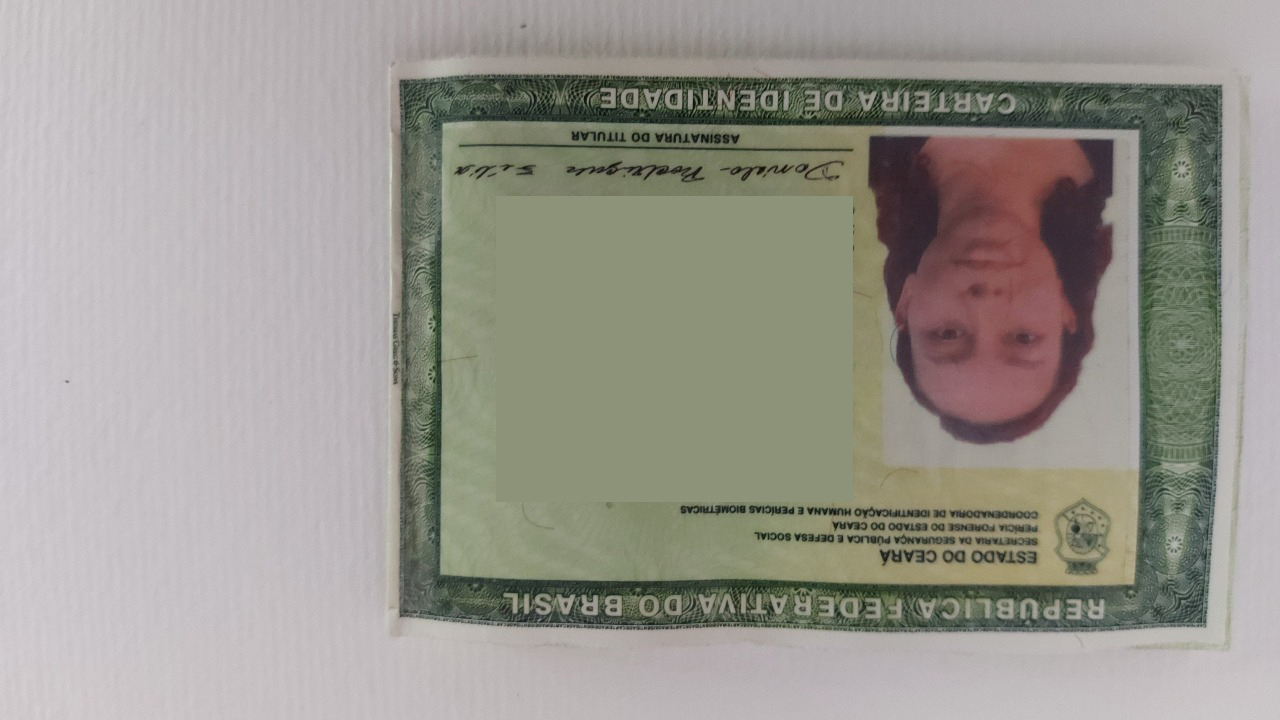

In [ ]:
image6 = get_image ('image6.jpeg')
image6

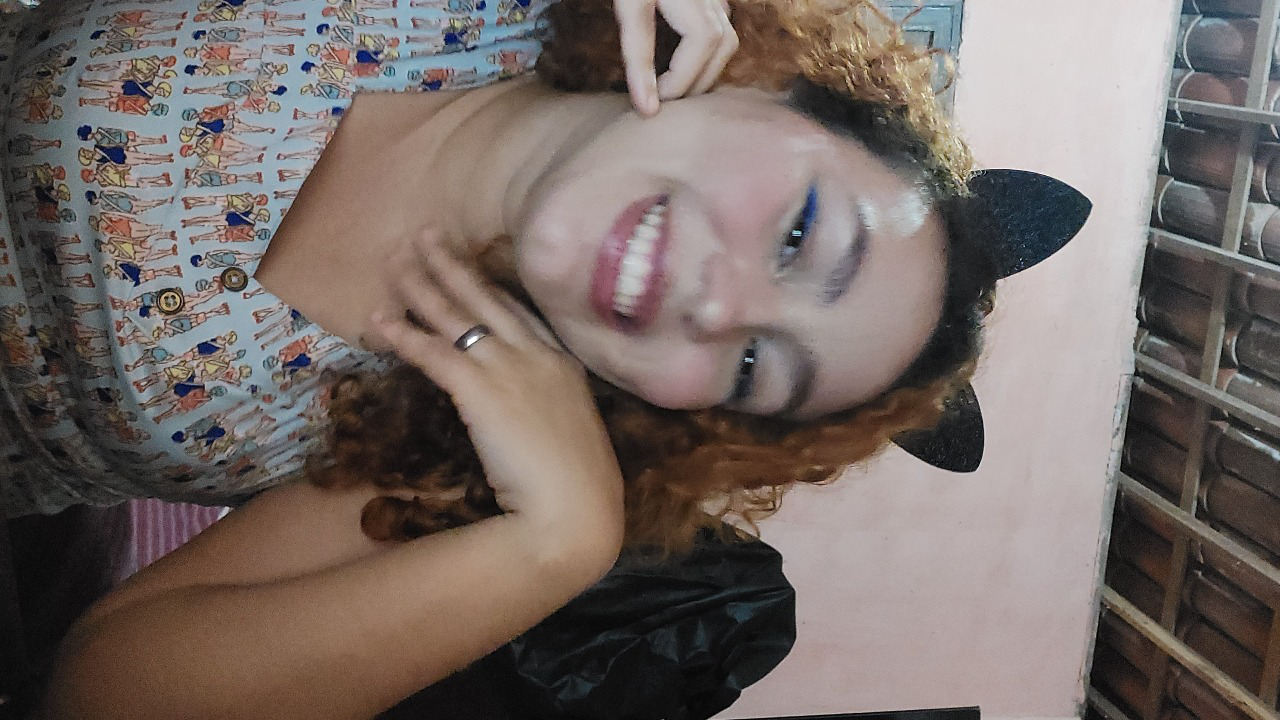

In [ ]:
image4 = get_image ('image4.jpeg')
image4

-imagens --- comparar 01

In [ ]:
source_image = get_image('image6.jpeg') #imagem de origem
target_image = get_image('image4.jpeg') #imagem de destino

response = client.compare_faces(  #CompareFaces - Utiliza ML para probabilidade
    SourceImage={'Bytes': get_bytes(source_image)}, 
    TargetImage={'Bytes': get_bytes(target_image)}
)
matched = response['FaceMatches']
matched

[{'Face': {'BoundingBox': {'Height': 0.41004350781440735,
    'Left': 0.3974306583404541,
    'Top': 0.15909504890441895,
    'Width': 0.33427292108535767},
   'Confidence': 99.99407196044922,
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.6272563338279724,
     'Y': 0.33437731862068176},
    {'Type': 'eyeRight', 'X': 0.5876333117485046, 'Y': 0.5149863958358765},
    {'Type': 'mouthLeft', 'X': 0.5170443058013916, 'Y': 0.29136529564857483},
    {'Type': 'mouthRight', 'X': 0.4841277599334717, 'Y': 0.4422135353088379},
    {'Type': 'nose', 'X': 0.5587120652198792, 'Y': 0.43481677770614624}],
   'Pose': {'Pitch': 16.154300689697266,
    'Roll': 111.97834777832031,
    'Yaw': 13.536873817443848},
   'Quality': {'Brightness': 82.87733459472656,
    'Sharpness': 67.22731018066406}},
  'Similarity': 99.5982437133789}]

----- imagem e onfidencia 

In [ ]:
if len(matched) > 0:
  for item in matched:
    print(f"Semelhança de {item['Similarity']} % com {item['Face']['Confidence']} % de confiança")

Semelhança de 99.5982437133789 % com 99.99407196044922 % de confiança
